In [47]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset

In [48]:
data=pd.read_excel("iris (1).xls ")

In [49]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [50]:
data.shape

(150, 5)

In [51]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Preprocessing Steps

In [54]:
data["Classification"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [55]:
data["Classification"].nunique()

3

In [56]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [57]:
for i in ["SL","SW","PL","PW"]:
    data[i]=data[i].fillna(data[i]).median()

In [58]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

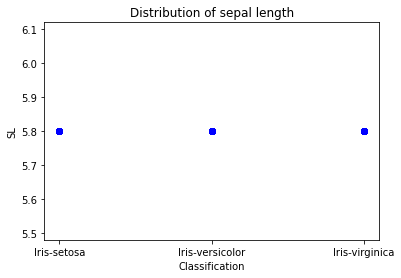

In [59]:
plt.scatter(x=data["Classification"],y=data["SL"],color="blue")
plt.title("Distribution of sepal length")
plt.xlabel("Classification")
plt.ylabel("SL")
plt.show()

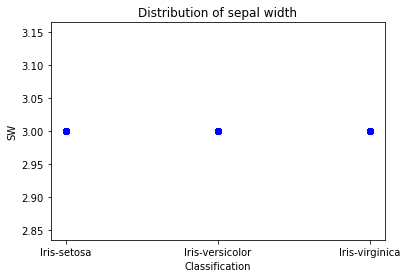

In [60]:
plt.scatter(x=data["Classification"],y=data["SW"],color="blue")
plt.title("Distribution of sepal width")
plt.xlabel("Classification")
plt.ylabel("SW")
plt.show()

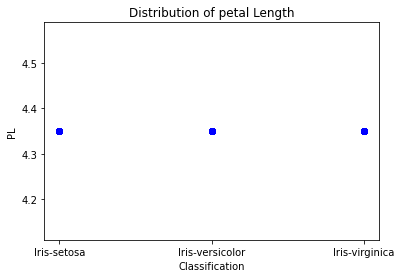

In [61]:
plt.scatter(x=data["Classification"],y=data["PL"],color="blue")
plt.title("Distribution of petal Length")
plt.xlabel("Classification")
plt.ylabel("PL")
plt.show()

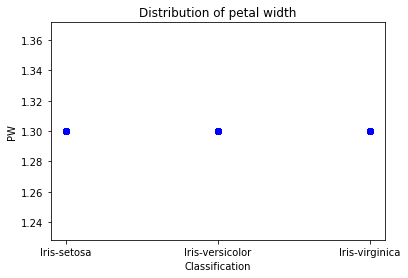

In [62]:
plt.scatter(x=data["Classification"],y=data["PW"],color="blue")
plt.title("Distribution of petal width")
plt.xlabel("Classification")
plt.ylabel("PW")
plt.show()

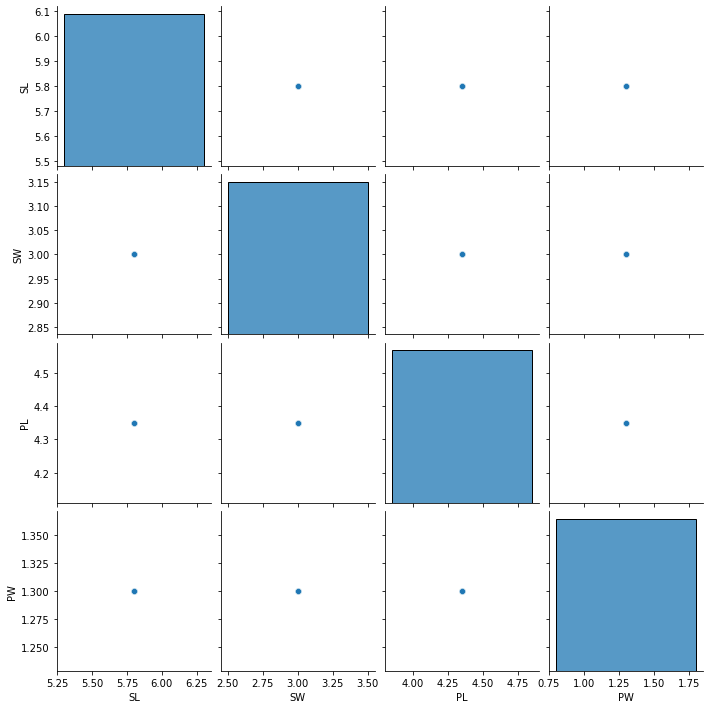

In [63]:
sns.pairplot(data)

In [77]:
#splitting data as X and y for training and testing
X=data.drop("Classification",axis=1)
y=data["Classification"]

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Classification-Logistic Regression Model

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
lr=LogisticRegression()
lr=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [80]:
lr.score(X,y)

0.3333333333333333

In [81]:
accuracy_score(y_test,y_pred)

0.3

In [82]:
confusion_matrix(y_test,y_pred)

array([[ 0, 10,  0],
       [ 0,  9,  0],
       [ 0, 11,  0]], dtype=int64)

# KNN Model

In [83]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=range(5,15,2)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_KNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

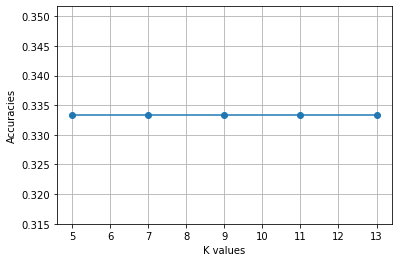

In [84]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K values")
plt.ylabel("Accuracies")
plt.grid()

In [85]:
classifier=KNeighborsClassifier(n_neighbors=9)
classifier=classifier.fit(X_train,y_train)
y_pred_KNN=classifier.predict(X_test)

In [86]:
accuracy_score(y_test,y_pred_KNN)

0.3333333333333333

In [87]:
confusion_matrix(y_test,y_pred_KNN)

array([[10,  0,  0],
       [ 9,  0,  0],
       [11,  0,  0]], dtype=int64)

# DecisionTree Classifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.3


# Random Forest Classifier

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
rf=rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.3


# KNN Model is better 